In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
 type(train_images)

numpy.ndarray

In [7]:
train_images[0, 23, 23] # Let's have a look at one pixel
# Our pixel values are between 0 and 255, 0 being black and 255 
# being white. This means we have agrayscaleimage as there are 
# no color channels
# 我们的像素值在0到255之间，0为黑色，255为白色。这意味着我们有灰度图像，
# 因为没有颜色通道

194

In [9]:
train_labels[:10] # Let's have a look at the first 10 train labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
test_labels.shape

(10000,)

In [11]:
type(train_labels)


numpy.ndarray

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<function matplotlib.pyplot.show(close=None, block=None)>

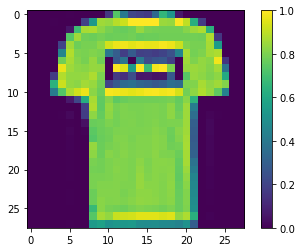

In [42]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show

# Data Preprocessing
### The last step before creating our modelis to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scal all of our greyscale pixel values (0-255) to bebetween 0 and 1. We can do this by dividing each value in the training and testing sets by 255. We do this because smaller values will make iteasier for the model to process our values.
### 创建模型之前的最后一步是预处理数据。这仅意味着在向模型提供数据之前对其进行一些先验转换。在这种情况下，我们只需将所有灰度像素值（0-255）缩放到0到1之间即可。我们可以通过将训练和测试集中的每个值除以255来实现此目的。我们这样做是因为较小的值会更容易让模型来处理我们的价值观。

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building the Model
### Now it's time to build the modell We are going to use akeras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right) Well break down each layer and its architecture below.
### 现在该构建模型了。我们将使用具有三个不同层的akeras顺序模型。该模型表示一个前馈神经网络（一个从左到右传递值的神经网络），它很好地分解了下面的每一层及其架构。

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)  Flatten意味着将每张图片分解成28x28的像素 Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小。
    keras.layers.Dense(128, activation='relu'), # hidden layer (2) Dense意味着前一层的所有神经元都将与这层相连接
    keras.layers.Dense(10, activation='softmax') # output layer (3) 选10的目的是因为有10个类别
])

##### Layer 1: This is our input layer and it will conist of 784neurons. We use the flatten layer with ar input shape of (28,28) to denote thatour input should come in ir  that shape. The fatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.                                        Layer 2: This is our first and only hidden layer. The dense denotes that this laye will be fully connected and each neuron from the previous layer connects to each neuron of this layer. Ithas 128neurons and uses the rectify linear unit activation function.                    Layer 3: Thisis ouroutput later and is also adense layer. Ithas 10 neurons that we willlookat to determine our models output. Each neuron represnts the probillity of a given image being one of the 10 different classes. The activation function  softmax is used ( on this layer to calculate a probability distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probillity of the image being that class.

# Complie the Model
### The last step in building the model is to defne the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.
### 建立模型的最后一步是定义我们要跟踪的损失函数，优化器和指标。我不会详细介绍为什么我们现在选择这些。

In [25]:
# Hyperparameter tunning
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
train_images.shape

(60000, 28, 28)

# Training the Model

In [34]:
model.fit(train_images, train_labels, epochs=4) # We pass the data, labels and epochs and watch the magic!

Epoch 1/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1771 - accuracy: 0.9336
Epoch 2/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1746 - accuracy: 0.9339
Epoch 3/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1686 - accuracy: 0.9360
Epoch 4/4
1875/1875 [==============================] - 2s 995us/step - loss: 0.1635 - accuracy: 0.9382


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 570us/step - loss: 0.3390 - accuracy: 0.8994
Test accuracy: 0.899399995803833


# Making Predictions

In [36]:
predictions = model.predict(test_images)

In [40]:
test_images.shape

(10000, 28, 28)

In [37]:
predictions.shape

(10000, 10)

In [39]:
predictions[0]

array([1.6361197e-12, 9.7423632e-13, 1.5601090e-17, 5.8039429e-13,
       5.5576740e-13, 6.0453976e-06, 9.3949310e-12, 9.5809752e-05,
       9.3197998e-14, 9.9989808e-01], dtype=float32)

In [41]:
np.argmax(predictions[0])

9

Sneaker


<function matplotlib.pyplot.show(close=None, block=None)>

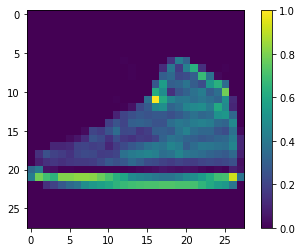

In [46]:
print(class_names[np.argmax(predictions[45])])
plt.figure()
plt.imshow(test_images[45])
plt.colorbar()
plt.grid(False)
plt.show

Pick a number: 45


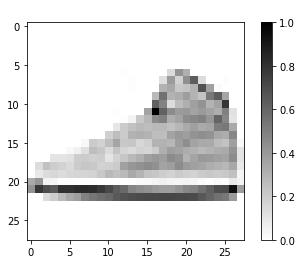

In [49]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(img, label, guess): 
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary) 
    plt.title("Excpected: " + label) 
    plt.xlabel("Guess:" + guess) 
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
def get_number():
    while True:
        num = input("Pick a number: ") 
        if num.isdigit():
            num = int(num)
            if 0 <=num <=1000:
                return int(num)
        else:
            print("Try again...")
    
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)